# Tester notebook

This notebook aims to create enviroment to simply test strategies developed in Stocks & Loss system for python

In [13]:
# imports 
from scraper import stock_daily
from analyzer import Analyzer
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt

## Settings
* Select stock ticker
* Define buy and sell strategy (buystrat and sellstrat)
* Define if you want to run stop loss and what value
* Same with profit taker

In [14]:
ticker = "MSFT"

buystrat = ["Mcstoch_ut1", "Mcstoch_ut2", "Mcstoch_ut3", "Mcstoch_ut4", "Mcstoch_dt1"]
sellstrat = ['Mcstoch']

sl = True
slval = 0.05

pt = False
ptval = 0.1

## Run calculation

In [15]:
stock = stock_daily(ticker, save=False)
trades = Analyzer(ticker=ticker, data=stock.data)

trades.strategy(buyStrategy=buystrat, sellStrategy=sellstrat,
    stopLoss=sl ,stopLossValue=slval, profitTaker=pt, profitTakerValue=ptval)

summary = trades.profit(capitalForEachTrade=200, comission=2)

profitByHolding = 100*((trades.data["Close"].iloc[-1]-trades.data["Close"].iloc[0])/trades.data["Close"].iloc[0])

In [16]:
print('Absolute profit last year:                ',np.round(summary["Profit[$]"].sum(),2),'$')
print('Relative profit last year:                ',np.round(summary["Profit[%]"].sum(),2),'%')
print('Relative profit by holding last year:     ',np.round(profitByHolding,2),'%')

Absolute profit last year:                 -32.57 $
Relative profit last year:                 -16.29 %
Relative profit by holding last year:      186.85 %


In [17]:
display(summary)

,Buy date,Buy price,Buy value,Position,Sell date,Sell price,Sell value,Comission,Good trade?,Profit[%],Profit[$]
0,2020-08-17,39.919998,200,5.010020,2020-08-21,38.919998,194.989980,2,0.0,-3.505010,-7.010020
1,2020-08-26,39.900002,200,5.012531,2020-08-31,38.259998,191.779433,2,0.0,-5.110284,-10.220567
2,2020-11-04,56.119999,200,3.563792,2020-11-24,66.690002,237.669293,2,1.0,17.834647,35.669293
3,2020-11-25,69.989998,200,2.857551,2020-12-17,81.820000,233.804836,2,1.0,15.902418,31.804836
4,2020-12-18,83.809998,200,2.386350,2020-12-23,81.900002,195.442081,2,0.0,-3.278960,-6.557919
5,2021-01-05,75.139999,200,2.661698,2021-01-06,71.382999,190.000000,2,0.0,-6.000000,-12.000000
6,2021-01-13,82.480003,200,2.424830,2021-01-15,78.356003,190.000000,2,0.0,-6.000000,-12.000000
7,2021-01-19,81.440002,200,2.455796,2021-01-26,77.368002,190.000000,2,0.0,-6.000000,-12.000000
8,2021-02-01,80.480003,200,2.485089,2021-02-17,84.400002,209.741546,2,1.0,3.870773,7.741546
9,2021-02-24,76.430000,200,2.616774,2021-02-25,72.608500,190.000000,2,0.0,-6.000000,-12.000000


## Visualizations

Successful trades are showcased as a light green fill, similarly, failed trades as a red fill

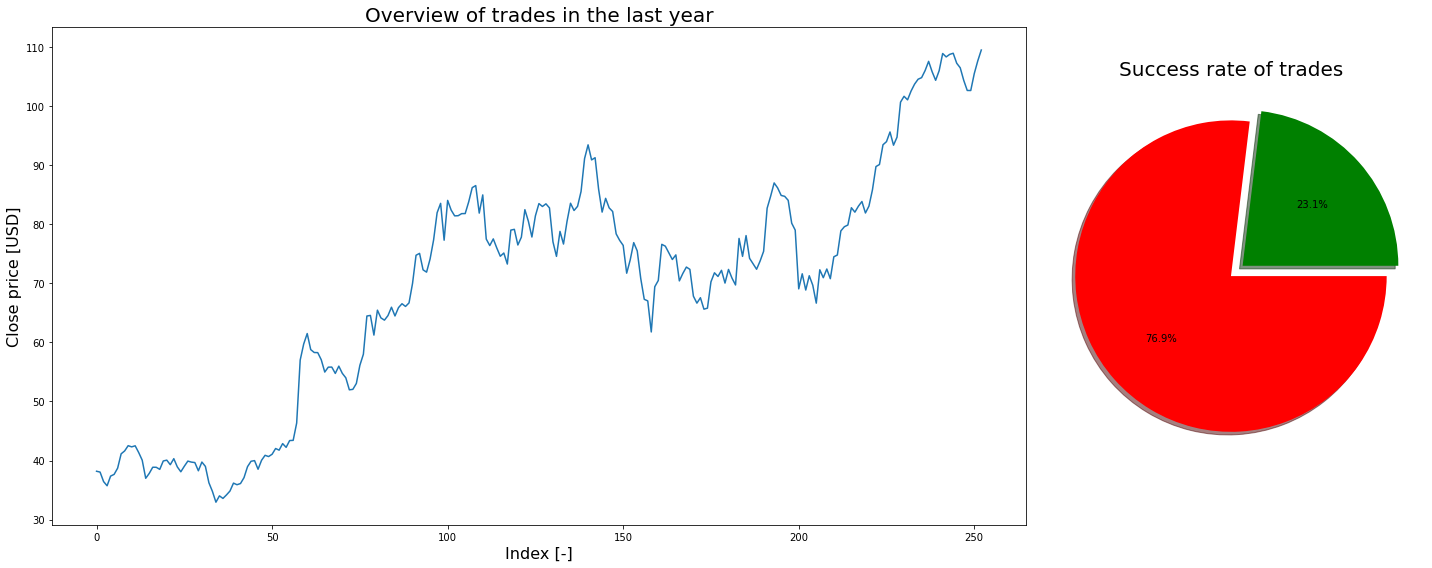

In [18]:
gtrades = summary["Good trade?"].sum()
trades = summary["Good trade?"].size

fig, ax = plt.subplots(ncols=2, figsize=(20,8), gridspec_kw={'width_ratios': [2.5, 1]})

# plot closed prices and highlighted trades
ax[0].plot(stock.data["Close"])
ax[0].set_title("Overview of trades in the last year", fontsize=20)
ax[0].set_ylabel("Close price [USD]", fontsize=16)
ax[0].set_xlabel("Index [-]", fontsize=16)

# plot piechart with percentage of succesful trades (profit / loss)
ax[1].pie([gtrades, trades-gtrades], colors=["g","r"], shadow=True, explode=(0.1, 0), autopct="%1.1f%%")
ax[1].set_title("Success rate of trades", fontsize=20)

fig.tight_layout()